In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import scipy
import pickle
import warnings

import sys
sys.path.append('..')
from construct_graph.graph import Graph, Flat
import construct_graph
import solve_laplace_operator

import sparseqr

def calculate_pde_eigenvalues(m, n):
    return np.sqrt((((2 * np.pi * m)**2 + (2 * np.pi * n)**2)) / 2)

def generate_guesses(x, num_Vs):
    guesses = []
    for i in x:
        if np.abs(i) < 1e-15:
            guesses.append(np.array([1e-15]))
        else:
            if num_Vs < 2000:
                guesses.append(np.linspace(0.8 * i, i + 0.2, 80))
            else:
                guesses.append(np.linspace(0.93 * i, i + 0.02, 60))
                
    return np.concatenate(guesses)

In [2]:
powers_of_10_lims = (2, 6)
num_Vs_per_tile = 1
num_graphs_per_power_of_10 = 5
total_dpowers = num_graphs_per_power_of_10 * (powers_of_10_lims[1] - powers_of_10_lims[0]) + 1
power_linspace = np.linspace(powers_of_10_lims[0], powers_of_10_lims[1], total_dpowers)

nums_Vs = np.int64(10**power_linspace[4:])

In [3]:
current_nums_Vs = nums_Vs[:-4].copy()

In [4]:
g = construct_graph.tiling.Tiling(tile_type='Delaunay', num_Vs_for_tile=current_nums_Vs[0],
                                    num_horizontal_displacements=1,
                                    num_vertical_displacements=1,
                                    autoplot=False)

AttributeError: 'Tiling' object has no attribute 'horizontal_displacement'

In [131]:
# file = open(f"tiling/random_delaunay_triangulation_periodic/eigenvalue_data.pkl", "wb")
# pickle.dump(eigenvalue_data, file)
# file.close()

# file = open(f"tiling/random_delaunay_triangulation_periodic/eigenvalue_data.pkl", "rb")
# eigenvalue_data = pickle.load(file)
# file.close()

In [115]:
run_eigenvalue_calculations = True

In [116]:
continuum_eigs = np.array([calculate_pde_eigenvalues(0, 0), 
                           calculate_pde_eigenvalues(0, 1), 
                           calculate_pde_eigenvalues(1, 1)])

printerval = np.inf

if run_eigenvalue_calculations:

    for num_Vs in current_nums_Vs[7:8]:
        print()
        print(num_Vs)
        if num_Vs < 2000: num_samplings = 64
        else: num_samplings = 8
        
        # eigenvalue_data[num_Vs] = {}
        for seed in range(len(eigenvalue_data[num_Vs]), 64):
            print(seed)
            np.random.seed(seed)
            g = construct_graph.tiling.Tiling(tile_type='Delaunay', num_Vs_for_tile=num_Vs,
                                              num_horizontal_displacements=1,
                                              num_vertical_displacements=1,
                                              autoplot=False)

            guesses = np.concatenate((np.array([1e-15]), np.linspace(4.2, 4.31, 14)))
            eigs = solve_laplace_operator.solve_laplace_operator.Eigenvalue_Calculator(g)
            ks = eigs(guesses, printerval=printerval, max_steps=1000, tol=1e-12, solve_type="SVD iterate")
            _, index = np.unique(np.round(ks, 6), return_index=True)
            eigenvalues = ks[index]
            eigenvalue_data[g.num_Vs][seed] = eigenvalues.copy()
            print(np.round(eigenvalues, 4))

        print()

run_eigenvalue_calculations = False


15848
18
[0.     4.2063 4.2543 4.2751 4.3098]
19
[0.     4.2236 4.2373 4.2846 4.3046]
20
[0.     4.2179 4.2517 4.2729 4.2971]
21
[0.     4.2412 4.2526 4.2595 4.2855]
22
[0.     4.2379 4.25   4.2781 4.2909]
23
[0.     4.2382 4.2555 4.2651 4.2876]
24
[-0.      4.2241  4.2585  4.2707  4.2944]
25
[0.     4.2252 4.2464 4.2735 4.3098]
26
[0.     4.2151 4.2601 4.2671 4.2958]
27
[0.     4.2359 4.2397 4.2734 4.287 ]
28
[0.     4.2286 4.2553 4.2685 4.3044]
29
[-0.      4.2266  4.2551  4.2735  4.2875]
30
[0.     4.2276 4.2446 4.2726 4.2979]
31
[0.     4.2165 4.2554 4.2773 4.2865]
32
[0.     4.2369 4.2516 4.2716 4.2903]
33
[0.     4.222  4.2452 4.274  4.3051]
34
[0.     4.2323 4.2391 4.2832 4.2931]
35
[-0.      4.2426  4.2468  4.2788  4.28  ]
36
[0.     4.2419 4.2482 4.2855 4.2876]
37
[0.     4.2491 4.2627 4.2718 4.2798]
38
[-0.      4.2219  4.2506  4.2687  4.3033]
39
[0.     4.2173 4.2677 4.2713 4.2946]
40
[0.     4.2338 4.2475 4.2789 4.2915]
41
[0.     4.2284 4.2605 4.2693 4.294 ]
42
[0.     4.

In [120]:
mn = [[0, 0], [0, 1], [1, 1]]

In [124]:
d0 = []
for num_Vs in current_nums_Vs:
    a = np.array([ed[1:5] for ed in eigenvalue_data[num_Vs].values()])
    d0.append(np.mean(a))
d0 = np.array(d0)

In [125]:
d0_difs = []
nums_Vs_difs = []
for i in range(len(current_nums_Vs) - 1):
    d0_difs.append(np.abs(d0[i] - d0[i + 1]))
    nums_Vs_difs.append(np.abs(current_nums_Vs[i] - current_nums_Vs[i + 1]))

d0_difs = np.array(d0_difs)
nums_Vs_difs = np.array(nums_Vs_difs)

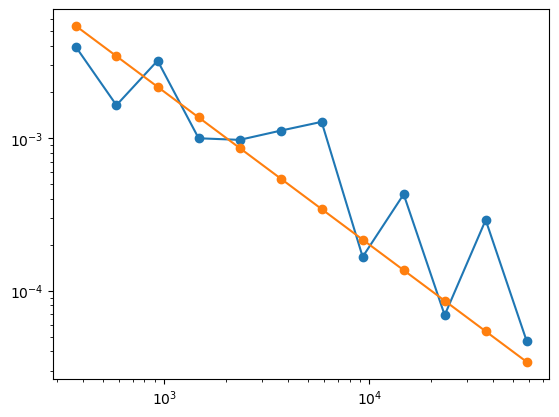

In [126]:
plt.loglog(nums_Vs_difs, d0_difs, 'o-')
plt.loglog(nums_Vs_difs, nums_Vs_difs**(-1.)*2, 'o-')

In [128]:
alpha = 1
rel_errs = np.abs(d0 - alpha * calculate_pde_eigenvalues(0, 1)) / (alpha * calculate_pde_eigenvalues(0, 1))

In [129]:
d0 / calculate_pde_eigenvalues(0, 1)

array([0.95626821, 0.95715603, 0.95752423, 0.95824473, 0.95846839,
       0.95868674, 0.95893765, 0.95922409, 0.95926156, 0.95935774,
       0.95937331, 0.9594386 , 0.95944912])

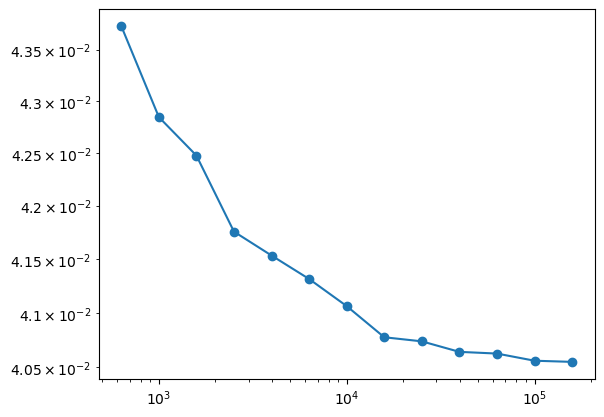

In [130]:
plt.loglog(current_nums_Vs, rel_errs, 'o-')
# plt.loglog(current_nums_Vs, current_nums_Vs**(-0.5) / 5, 'o-')

In [55]:
# full_data = {}

# for num_Vs_for_tile in nums_Vs_for_tile:
#     np.random.seed(0)

#     g = construct_graph.tiling.Tiling(tile_type='Delaunay', num_Vs_for_tile=num_Vs_for_tile,
#                                         num_horizontal_displacements=1,
#                                         num_vertical_displacements=1,
#                                         autoplot=False)
#     print(g.num_Vs)
#     p = Projector(g, eigenvalue_data[g.num_Vs])
#     for m, n in mn:
#         p(m, n)
#     full_data[g.num_Vs] = p.data

500


In [37]:
edata = Eigendata(full_data)

In [40]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
order_line_color = colors[6]
colors = colors[:6] + colors[7:]
def plot_loglog_rel_err(Num_Vs, rel_errs, show_legend=False):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 6), gridspec_kw={'height_ratios': [6, 1]})
    fig.subplots_adjust(hspace=0.2, )  # adjust space between axes

    # Separate data by size
    for en, rel_err in enumerate(rel_errs.T):
        if np.all(rel_err > 1e-10):
            ax1.loglog(Num_Vs, rel_err, 'o-', markersize=10, c=colors[en], label=str(en))
        else:
            ax2.loglog(Num_Vs, rel_err, 'o-', markersize=10, c=colors[en], label=str(en))
            if np.any(rel_err > 1e-10):
                relevant_data = rel_err[rel_err <= 1e-10]
                ax2.set_ylim(0.1 * np.min(relevant_data), 10 * np.max(relevant_data))

    # Setup convergence line
    ax1_data_lims = (np.min(rel_errs[rel_errs > 1e-10]), np.max(rel_errs[rel_errs > 1e-10]))
    ax1_log_dif = np.log10(ax1_data_lims[1]) - np.log10(ax1_data_lims[0])
    max_order_height = np.max(rel_errs) / np.max(Num_Vs**(-1.))
    order_line_data = max_order_height * Num_Vs**(-0.5) * 10**(0.15 * ax1_log_dif) / 10
    # order_line_data = max_order_height * Num_Vs**(-1.) * 1
    ax1.loglog(Num_Vs, order_line_data, 
               linewidth=4, c=order_line_color)

    # hide the spines between ax and ax2
    ax1.spines.bottom.set_visible(False)
    ax2.spines.top.set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop=False)  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()

    # Slanted lines
    d = 0.5
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                linestyle="none", color='k', mec='k', mew=3, clip_on=False)
    ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

    style_plot(fig, ax1, aspect=None, no_xticks=True)
    style_plot(fig, ax2, aspect=None)

    if show_legend:
        ax1.legend()
        ax2.legend()

    # ax1.set_ylim(2e-3, 2e0)

    return fig, fig.axes

(<Figure size 700x600 with 2 Axes>, [<Axes: >, <Axes: >])

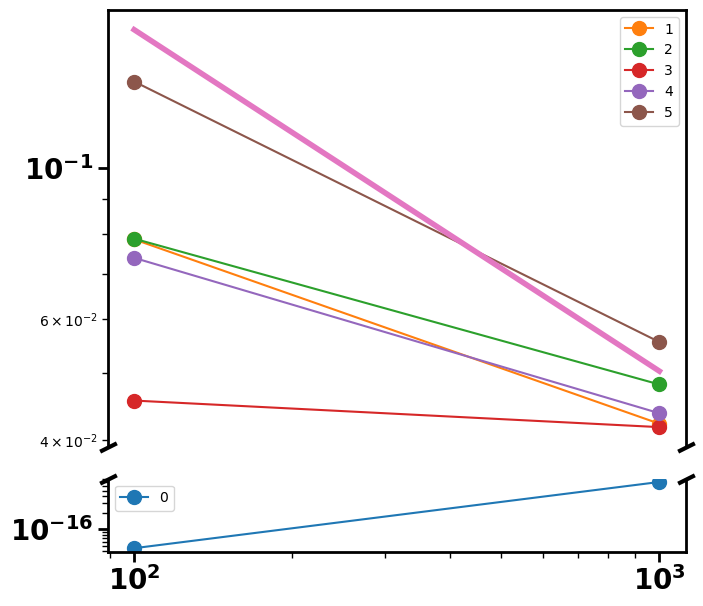

In [42]:
x = edata.V_nums
y = np.array(list(edata.relative_eigenvalue_differences.values())).T
plot_loglog_rel_err(x, y, show_legend=True)
# plt.savefig("tiling/bathroom_tile0_periodic/bathroom_tile0_periodic_tiling_eigenvalue_relerr.png", dpi=200, bbox_inches='tight')

In [63]:
plot_and_save_modes = True

if plot_and_save_modes:

    np.random.seed(0)

    g = construct_graph.tiling.Tiling(tile_type='Delaunay', num_Vs_for_tile=500,
                                        num_horizontal_displacements=1,
                                        num_vertical_displacements=1,
                                        autoplot=False)
    print(g.num_Vs)

    for m, n in mn:
        emodes = full_data[g.num_Vs][m, n]['graph']['eigenfunction']
        for en, emode in enumerate(emodes):
            fig, ax = g.plot_graph(eigenmode=emode.data, return_figax=True, background_color="black", linewidth=4)
            plt.savefig(f"tiling/random_delaunay_triangulation_periodic/mode_plots/eigenmode_{g.num_Vs}Vs_m{m}_n{n}_number{en}.png", dpi=200, bbox_inches='tight')
            plt.close()

500
